# Numerical Optimization

## Introduction

We consider convex problems with sufficient regularity, such that gradient information may be used. Algorithms that use these properties can be broadly classified as either **Line Search** methods or **Trust Region** methods. To illustrate both approaches, let us start with Taylor's theorem.

### Taylor's theorem

Suppose that $f: \mathbb{R}^d \rightarrow \mathbb{R}$  is continuously differentiable and that $p \in \mathbb{R}^d$. Then, we have that
$$f(x+p) = f(x) + \nabla f(x + tp)^T p,$$
for some $t \in (0,1)$. Furthermore, if $f$ is twice continuously differentiable,
$$\nabla f(x+p) = \nabla f(x) + \int_0^1 \nabla^2 f(x+tp) p\;\mathrm{d}t,$$
which implies
$$f(x+p) = f(x) + \nabla f(x)^T p + \frac{1}{2}p^T \nabla^2 f(x+tp) p,$$
for some $t \in (0,1)$.

Here, we have introduced the vector-valued gradient $\nabla f$ and the $d \times d$ Hessian matrix $\nabla^2 f$.


## Preparation

Before we explore some approaches, we need a differentiable function complete with gradient information. As we want make ourselves familiar with ML-relevant tools out there, we will make use of the library `PyTorch` and its auto-differentiation capabilities. As usual, `numpy` and `matplotlib` will be useful as well:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.autograd as autograd

Let us define a two-dimensional objective function, which we will be minimizing.

In [11]:
d = 2

class fun(torch.nn.Module):
  def __init__(self, D_in):
    super().__init__()
    self.c = torch.randn(1)
    self.b = torch.randn(D_in, 1)
    self.A = np.random.standard_exponential((D_in,D_in))
    #self.A = np.tril(self.A) + np.tril(self.A, -1).T
    self.A = torch.from_numpy(self.A).float()
    self.A = self.A.T @ self.A
  def forward(self, x):
    x = torch.from_numpy(x).float()
    x.requires_grad = True
    y = torch.sum(x * (self.A@x), 0) - 2.0 * self.b.T @ x + self.c
    return y
    
objective_function = fun(d)

We will be needing gradient information and potentially the Hessian as well. This is where auto-differentiation comes in. After a forward pass to compute $f(x_0)$, we can also evaluate $\nabla f(x_0)$ as well:

In [12]:
# getting the gradient
x0 = np.random.rand(2,1)
f0 = objective_function(x0) # forward pass
grad = f0.backward() # after having computed one step, this will compute the gradient
x0

array([[0.324653  ],
       [0.90904074]])

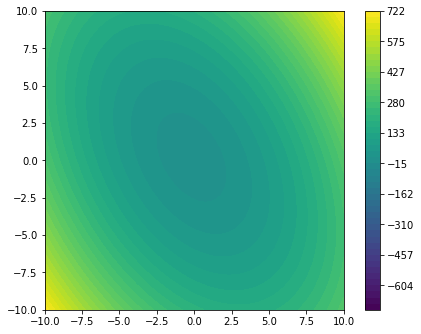

In [14]:
x = np.linspace(-10, 10, 40)
y = np.linspace(-10, 10, 40)
X, Y = np.meshgrid(x, y)
grid = np.vstack((X.flatten(),Y.flatten()))
Z = objective_function(grid)
Z = np.reshape(Z.detach().numpy(), (40,40))

plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(7.5, 5.5)
contourplot = plt.contourf(X, Y, Z, levels=np.linspace(-np.amax(Z),np.amax(Z),50))
cbar = plt.colorbar(contourplot)
plt.show()

## Steepest Descent Optimizer

The core idea of Line Search method is to update the solution $x_k$ iteratively according to

$x_{k+1} = x_k + \alpha_k p_k,$

where $p_k$ is a descent direction and $\alpha_k$ a certain step size. Ideally, this will result in a decreasing sequence

$f(x_0) > f(x_1) > \dots > f(x_{k-1}) > f(x_k)$

which converges to a certain minimum. These approaches are also called line-search methods, as we are looking for the minimum across the line defined by the search direction $p_k$. It is evident that convergence will depend on the specific choice of the descent direction $p_k$ and step size $\alpha_k$.

The natural choice for $p_k$ is to take the direction of steepest descent $-\nabla f(x_k)$. Taking the appropriate step size is a more difficult problem to solve.

In [8]:
def backtrack(f0, alpha0, x, p):
  t = -0.5*np.norm(f0)
  j = 0
  while 
    f1 = 

SyntaxError: invalid syntax (4095096631.py, line 4)

In [ ]:
def iterate(f, x0, alpha):
  f0 = f(x0)
  p0 = f0.backward()
  # compute the Wolfe condition
  return x0 - alpha*p0
  

## Analogy to linear systems

Coming from numerical linear algebra, I couldn't resist to introduce some linear algebra. A central problem of numerical linear algebra is the solution of linear systems of the form

$Ax = b.$